<div align="center">

# **Pruebas: Programas de rentas**

</div>

## Data

In [1]:
mujeres <- read.csv("../data/input/mujeres.csv")
aseguradas <- read.csv("../data/input/aseguradas_mujeres.csv")

## Librerias

In [2]:
source("../src/utils/acumulacion.R")
source("../src/utils/tasa_reemplazo_ahorro_individual.R")

## Acumulacion

In [3]:
r <- 0.0788
e <- 0.03
Sf <- 1423500
tc <- 0.115
n <- 25

acumulacion(r, e, Sf, tc, n)

[1] 75240864

## Ahorro Individual

In [17]:
x <- 65
r <- 0.0788
e <- 0.03
tc <- 0.185
Sm <- 1423500
Sf <- 1423500
n <- 35

ahorro_individual(mujeres, x, r, e, tc, Sm, Sf, n)

[1] 7.122856e-01 1.013939e+06

Tabla contingente



=== TABLA EDAD 57 AÑOS ===
Tasas de Reemplazo y Pensiones por años de cotización:


 Sf/SM   TR 25a   Pensión 25a   TR 35a   Pensión 35a   TR 42a   Pensión 42a
------  -------  ------------  -------  ------------  -------  ------------
     1   0.2212        314933   0.3681        523946   0.5000        711698
     2   0.2221        632416   0.3690       1050443   0.5009       1425946
     3   0.2224        949898   0.3693       1576939   0.5012       2140193
     4   0.2226       1267381   0.3694       2103435   0.5013       2854441
     5   0.2227       1584864   0.3695       2629931   0.5014       3568689
     6   0.2227       1901836   0.3695       3155918   0.5014       4282426
     7   0.2227       2218809   0.3695       3681904   0.5014       4996164
     8   0.2227       2535782   0.3695       4207890   0.5014       5709902
     9   0.2227       2852755   0.3695       4733876   0.5014       6423640
    10   0.2227       3169727   0.3695       5259863   0.5014       7137377
  

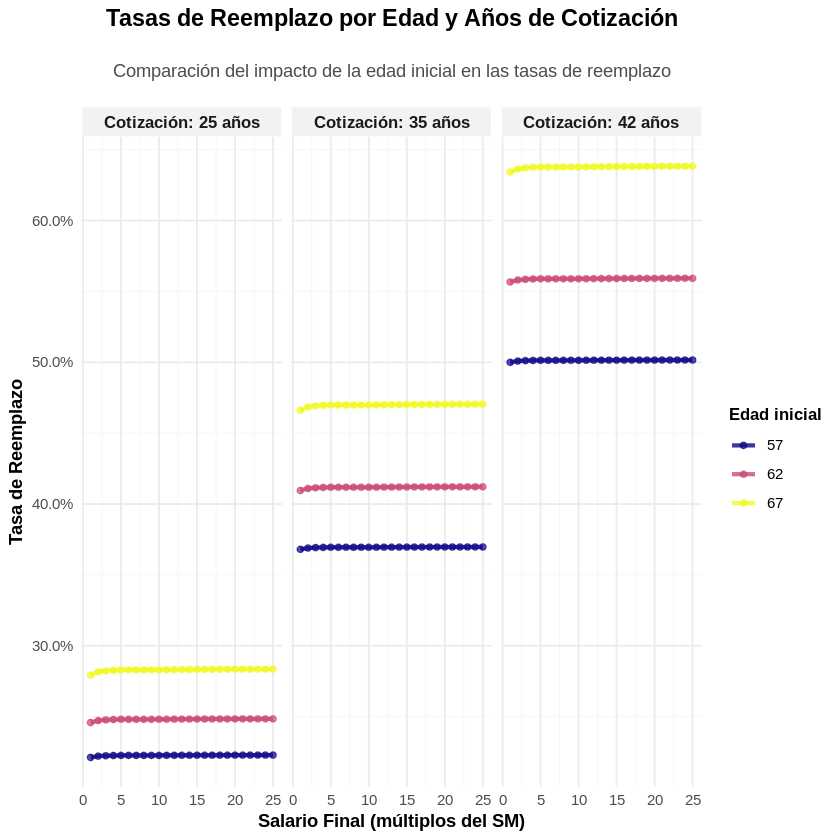

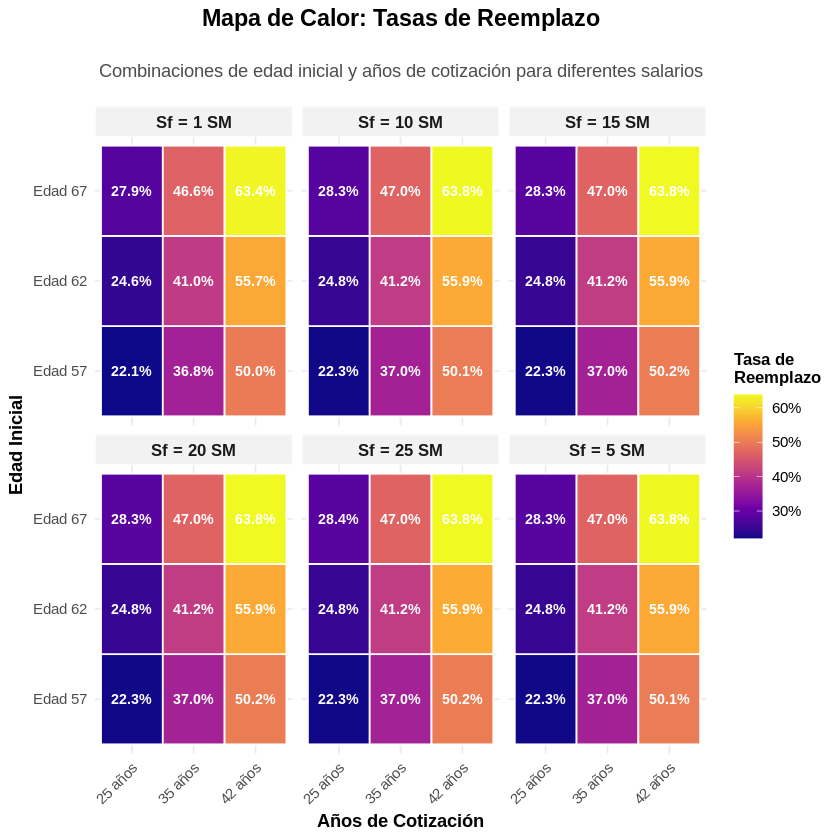

Warning message:
“Removed 675 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 675 rows containing missing values or values outside the scale range
(`geom_point()`).”


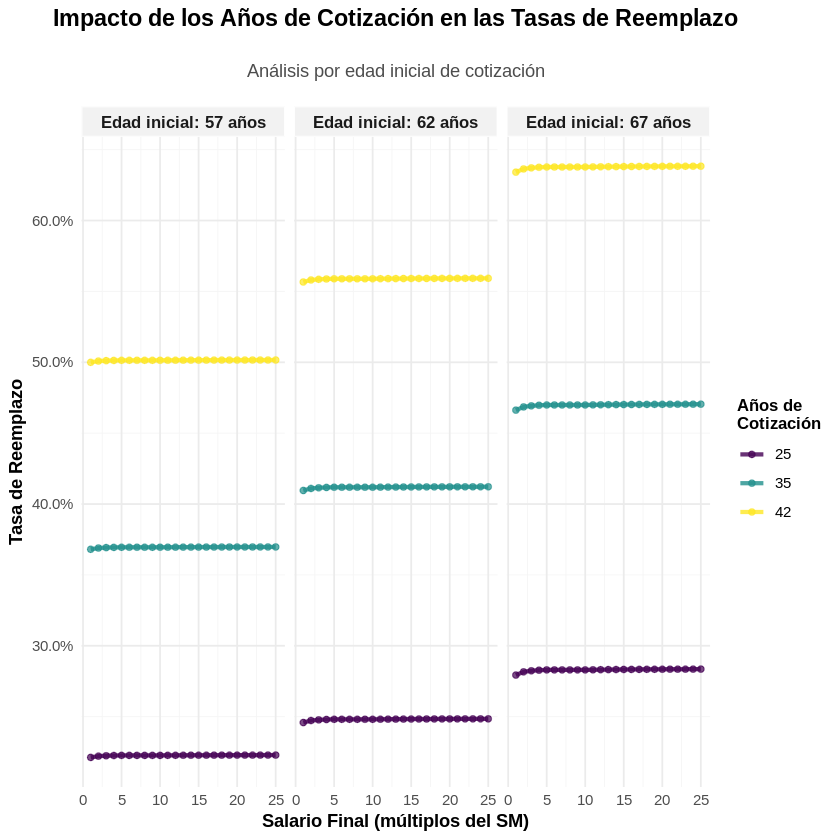

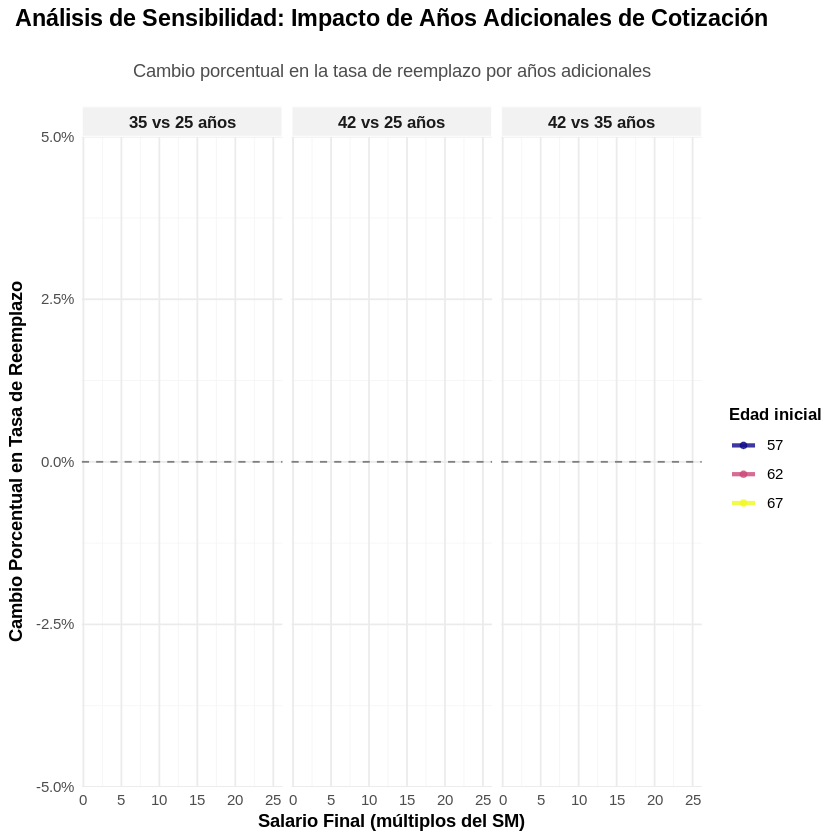

`geom_smooth()` using formula = 'y ~ x'


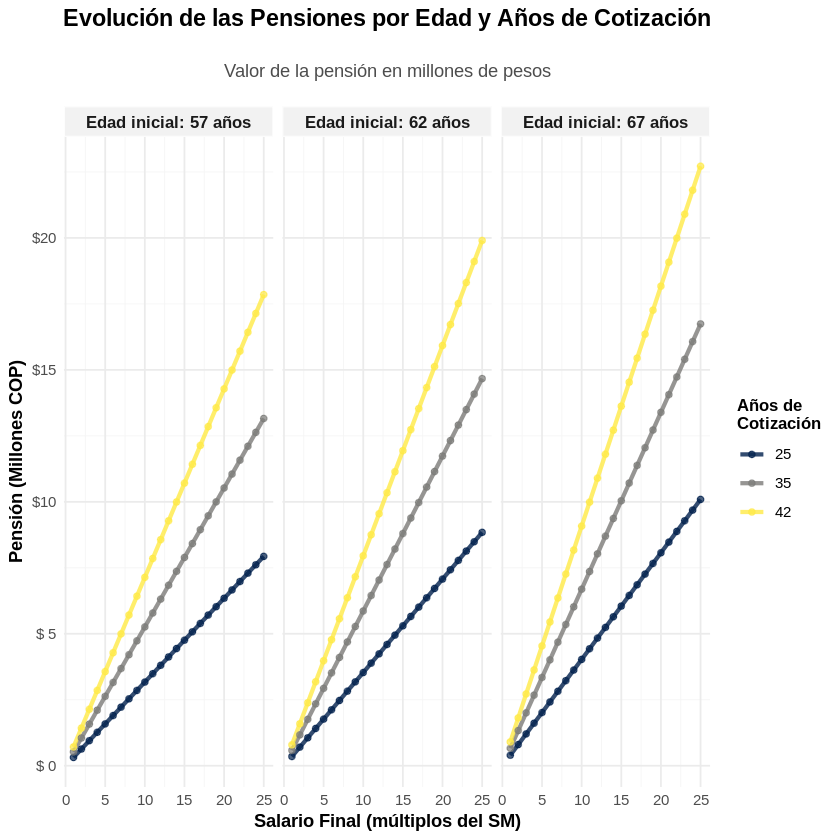



=== TABLA RESUMEN ESTADÍSTICO (TR Y PENSIONES) ===


Edad   Años    TR Mín   TR Máx   TR Prom   Pensión Mín   Pensión Máx   Pensión Prom   TR (10 SM)   Pensión (10 SM)
-----  -----  -------  -------  --------  ------------  ------------  -------------  -----------  ----------------
57     25      0.2212   0.2229    0.2227          0.31          7.93           4.12       0.2227              3.17
57     35      0.3681   0.3697    0.3695          0.52         13.16           6.84       0.3695              5.26
57     42      0.5000   0.5016    0.5014          0.71         17.85           9.28       0.5014              7.14
62     25      0.2458   0.2485    0.2481          0.35          8.84           4.60       0.2481              3.53
62     35      0.4096   0.4122    0.4118          0.58         14.67           7.62       0.4118              5.86
62     42      0.5566   0.5593    0.5589          0.79         19.90          10.35       0.5589              7.96
67     25      0.2793   0

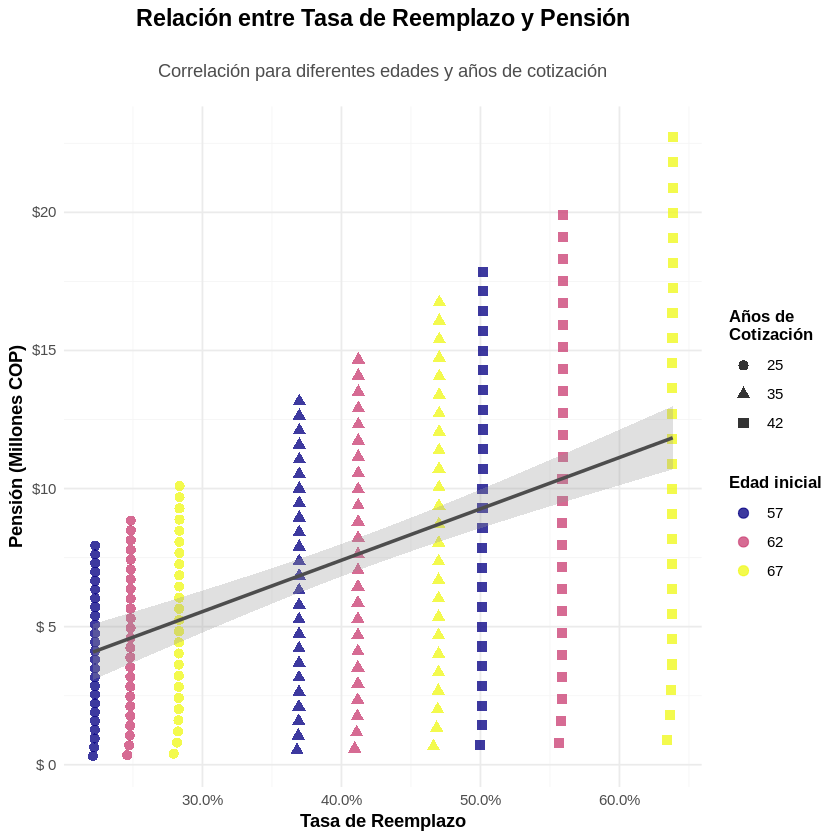

In [10]:
# Parámetros dados
r <- 0.0788
e <- 0.03
tc <- 0.115
Sm <- 1423500

# Valores de x y n
valores_x <- c(57, 62, 67)
valores_n <- c(25, 35, 42)
valores_Sf <- 1423500 * c(1:25)

# Cargar librerías necesarias
library(knitr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(viridis)
library(scales)

# NUEVA ESTRUCTURA: 3 tablas principales (una por edad x)
# Cada tabla tiene columnas para diferentes valores de n

tablas_por_edad <- list()

for(edad in valores_x) {
    # Crear tabla base para esta edad
    tabla_edad <- data.frame(
        Sf_SM = 1:25
    )
    
    # Agregar columnas para cada valor de n
    for(años in valores_n) {
        col_tr <- paste0("tr_n", años)
        col_m <- paste0("m_n", años)
        
        # Vectores para almacenar resultados
        tr_values <- numeric(25)
        m_values <- numeric(25)
        
        # Calcular para cada valor de Sf
        for(j in 1:25) {
            resultado <- ahorro_individual(
                tabla_mortalidad = mujeres,
                x = edad,
                r = r,
                e = e,
                tc = tc,
                Sm = Sm,
                Sf = valores_Sf[j],
                n = años
            )
            
            tr_values[j] <- resultado[1]
            m_values[j] <- resultado[2]
        }
        
        # Agregar columnas a la tabla
        tabla_edad[[col_tr]] <- tr_values
        tabla_edad[[col_m]] <- m_values
    }
    
    # Guardar tabla
    nombre_tabla <- paste0("tabla_edad_", edad)
    tablas_por_edad[[nombre_tabla]] <- tabla_edad
}

# Mostrar las 3 tablas principales COMPLETAS (con tasas de reemplazo Y pensiones)
for(edad in valores_x) {
    nombre_tabla <- paste0("tabla_edad_", edad)
    cat("\n\n")
    cat(paste0("=== TABLA EDAD ", edad, " AÑOS ===\n"))
    cat("Tasas de Reemplazo y Pensiones por años de cotización:\n")
    
    # Mostrar tabla completa con formato organizado
    tabla_completa <- tablas_por_edad[[nombre_tabla]]
    
    # Reorganizar columnas para mejor visualización
    tabla_ordenada <- tabla_completa %>%
        select(Sf_SM, 
               tr_n25, m_n25,
               tr_n35, m_n35, 
               tr_n42, m_n42)
    
    print(kable(tabla_ordenada, digits = c(0, 4, 0, 4, 0, 4, 0), format = "simple",
                col.names = c("Sf/SM", "TR 25a", "Pensión 25a", "TR 35a", "Pensión 35a", "TR 42a", "Pensión 42a")))
}

# VISUALIZACIONES MEJORADAS CON GGPLOT2

# 1. Gráfico comparativo de tasas de reemplazo por edad
crear_datos_para_grafico <- function() {
    datos_completos <- data.frame()
    
    for(edad in valores_x) {
        nombre_tabla <- paste0("tabla_edad_", edad)
        tabla <- tablas_por_edad[[nombre_tabla]]
        
        for(años in valores_n) {
            col_tr <- paste0("tr_n", años)
            col_m <- paste0("m_n", años)
            
            datos_temp <- data.frame(
                Sf_SM = tabla$Sf_SM,
                tr = tabla[[col_tr]],
                pension = tabla[[col_m]],
                edad = factor(edad),
                años_cotizacion = factor(años)
            )
            
            datos_completos <- rbind(datos_completos, datos_temp)
        }
    }
    
    return(datos_completos)
}

datos_grafico <- crear_datos_para_grafico()

# Tema personalizado
tema_bonito <- theme_minimal() +
    theme(
        plot.background = element_rect(fill = "white", color = NA),
        panel.background = element_rect(fill = "white", color = NA),
        panel.grid.major = element_line(color = "gray92", size = 0.5),
        panel.grid.minor = element_line(color = "gray96", size = 0.25),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5, margin = margin(b = 20)),
        plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray30", margin = margin(b = 15)),
        axis.title = element_text(size = 11, face = "bold"),
        axis.text = element_text(size = 9),
        legend.title = element_text(size = 10, face = "bold"),
        legend.text = element_text(size = 9),
        strip.text = element_text(size = 10, face = "bold"),
        strip.background = element_rect(fill = "gray95", color = "white")
    )

# Gráfico 1: Líneas por edad, faceteado por años de cotización
p1 <- ggplot(datos_grafico, aes(x = Sf_SM, y = tr, color = edad)) +
    geom_line(size = 1.2, alpha = 0.8) +
    geom_point(size = 1.5, alpha = 0.7) +
    facet_wrap(~paste("Cotización:", años_cotizacion, "años"), ncol = 3) +
    scale_color_viridis_d(name = "Edad inicial", option = "plasma") +
    scale_x_continuous(breaks = seq(0, 25, 5)) +
    scale_y_continuous(labels = percent_format(accuracy = 0.1)) +
    labs(
        title = "Tasas de Reemplazo por Edad y Años de Cotización",
        subtitle = "Comparación del impacto de la edad inicial en las tasas de reemplazo",
        x = "Salario Final (múltiplos del SM)",
        y = "Tasa de Reemplazo"
    ) +
    tema_bonito

print(p1)

# Gráfico 2: Heatmap de tasas de reemplazo
datos_heatmap <- datos_grafico %>%
    filter(Sf_SM %in% c(1, 5, 10, 15, 20, 25)) %>%
    mutate(
        edad_label = paste("Edad", edad),
        años_label = paste(años_cotizacion, "años")
    )

p2 <- ggplot(datos_heatmap, aes(x = años_label, y = edad_label, fill = tr)) +
    geom_tile(color = "white", size = 0.5) +
    geom_text(aes(label = percent(tr, accuracy = 0.1)), color = "white", fontface = "bold", size = 3) +
    facet_wrap(~paste("Sf =", Sf_SM, "SM"), ncol = 3) +
    scale_fill_viridis_c(name = "Tasa de\nReemplazo", option = "plasma", labels = percent_format()) +
    labs(
        title = "Mapa de Calor: Tasas de Reemplazo",
        subtitle = "Combinaciones de edad inicial y años de cotización para diferentes salarios",
        x = "Años de Cotización",
        y = "Edad Inicial"
    ) +
    tema_bonito +
    theme(
        axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid = element_blank()
    )

print(p2)

# Gráfico 3: Comparación directa por años de cotización
p3 <- ggplot(datos_grafico, aes(x = Sf_SM, y = tr, color = años_cotizacion)) +
    geom_line(size = 1.2, alpha = 0.8) +
    geom_point(size = 1.5, alpha = 0.7) +
    facet_wrap(~paste("Edad inicial:", edad, "años"), ncol = 3) +
    scale_color_viridis_d(name = "Años de\nCotización", option = "viridis") +
    scale_x_continuous(breaks = seq(0, 25, 5)) +
    scale_y_continuous(labels = percent_format(accuracy = 0.1)) +
    labs(
        title = "Impacto de los Años de Cotización en las Tasas de Reemplazo",
        subtitle = "Análisis por edad inicial de cotización",
        x = "Salario Final (múltiplos del SM)",
        y = "Tasa de Reemplazo"
    ) +
    tema_bonito

print(p3)

# Gráfico 4: Análisis de sensibilidad - Diferencias porcentuales
datos_sensibilidad <- datos_grafico %>%
    pivot_wider(names_from = años_cotizacion, values_from = tr, names_prefix = "años_") %>%
    mutate(
        diff_35_25 = (años_35 - años_25) / años_25,
        diff_42_35 = (años_42 - años_35) / años_35,
        diff_42_25 = (años_42 - años_25) / años_25
    ) %>%
    select(Sf_SM, edad, starts_with("diff_")) %>%
    pivot_longer(cols = starts_with("diff_"), names_to = "comparacion", values_to = "diferencia_pct") %>%
    mutate(
        comparacion = case_when(
            comparacion == "diff_35_25" ~ "35 vs 25 años",
            comparacion == "diff_42_35" ~ "42 vs 35 años",
            comparacion == "diff_42_25" ~ "42 vs 25 años"
        )
    )

p4 <- ggplot(datos_sensibilidad, aes(x = Sf_SM, y = diferencia_pct, color = edad)) +
    geom_line(size = 1.2, alpha = 0.8) +
    geom_point(size = 1.5, alpha = 0.7) +
    geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
    facet_wrap(~comparacion, ncol = 3) +
    scale_color_viridis_d(name = "Edad inicial", option = "plasma") +
    scale_x_continuous(breaks = seq(0, 25, 5)) +
    scale_y_continuous(labels = percent_format(accuracy = 0.1)) +
    labs(
        title = "Análisis de Sensibilidad: Impacto de Años Adicionales de Cotización",
        subtitle = "Cambio porcentual en la tasa de reemplazo por años adicionales",
        x = "Salario Final (múltiplos del SM)",
        y = "Cambio Porcentual en Tasa de Reemplazo"
    ) +
    tema_bonito

print(p4)

# NUEVO: Gráfico 5 - Evolución de las pensiones
p5 <- ggplot(datos_grafico, aes(x = Sf_SM, y = pension/1000000, color = años_cotizacion)) +
    geom_line(size = 1.2, alpha = 0.8) +
    geom_point(size = 1.5, alpha = 0.7) +
    facet_wrap(~paste("Edad inicial:", edad, "años"), ncol = 3) +
    scale_color_viridis_d(name = "Años de\nCotización", option = "cividis") +
    scale_x_continuous(breaks = seq(0, 25, 5)) +
    scale_y_continuous(labels = function(x) paste0("$", format(x, big.mark = ".", decimal.mark = ","))) +
    labs(
        title = "Evolución de las Pensiones por Edad y Años de Cotización",
        subtitle = "Valor de la pensión en millones de pesos",
        x = "Salario Final (múltiplos del SM)",
        y = "Pensión (Millones COP)"
    ) +
    tema_bonito

print(p5)

# NUEVO: Gráfico 6 - Relación TR vs Pensión
p6 <- ggplot(datos_grafico, aes(x = tr, y = pension/1000000)) +
    geom_point(aes(color = edad, shape = años_cotizacion), size = 2.5, alpha = 0.8) +
    geom_smooth(method = "lm", se = TRUE, color = "gray30", alpha = 0.3) +
    scale_color_viridis_d(name = "Edad inicial", option = "plasma") +
    scale_shape_manual(name = "Años de\nCotización", values = c(16, 17, 15)) +
    scale_x_continuous(labels = percent_format(accuracy = 0.1)) +
    scale_y_continuous(labels = function(x) paste0("$", format(x, big.mark = ".", decimal.mark = ","))) +
    labs(
        title = "Relación entre Tasa de Reemplazo y Pensión",
        subtitle = "Correlación para diferentes edades y años de cotización",
        x = "Tasa de Reemplazo",
        y = "Pensión (Millones COP)"
    ) +
    tema_bonito

print(p6)

# Tabla resumen mejorada (incluyendo pensiones)
resumen_mejorado <- datos_grafico %>%
    group_by(edad, años_cotizacion) %>%
    summarise(
        tr_min = min(tr),
        tr_max = max(tr),
        tr_promedio = mean(tr),
        pension_min = min(pension)/1000000,
        pension_max = max(pension)/1000000,
        pension_promedio = mean(pension)/1000000,
        tr_Sf10SM = tr[Sf_SM == 10],
        pension_Sf10SM = pension[Sf_SM == 10]/1000000,
        .groups = "drop"
    )

cat("\n\n=== TABLA RESUMEN ESTADÍSTICO (TR Y PENSIONES) ===\n")
print(kable(resumen_mejorado, digits = c(0, 0, 4, 4, 4, 2, 2, 2, 4, 2), format = "simple",
            col.names = c("Edad", "Años", "TR Mín", "TR Máx", "TR Prom", 
                         "Pensión Mín", "Pensión Máx", "Pensión Prom", "TR (10 SM)", "Pensión (10 SM)")))